In [62]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import fetch_20newsgroups_vectorized

t = fetch_20newsgroups_vectorized()

In [63]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(t.data, t.target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, X_test, y, y_test = train_test_split(t.data, t.target, test_size=0.25)
nb.fit(X, y)
preds = nb.predict(X_test)
print accuracy_score(y_test, preds)

0.749734888653


In [72]:
from sklearn.model_selection import cross_val_score

nb = MultinomialNB(alpha=1e-3)
print cross_val_score(nb, t.data, t.target, scoring='accuracy', cv=3).mean()

0.900831125783


In [76]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': np.logspace(-5, 1, 10)}
gs = GridSearchCV(nb, params, scoring='accuracy', n_jobs=-1, cv=3)
gs.fit(t.data, t.target)
print gs.best_score_
print gs.best_estimator_

0.900830829061
MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)


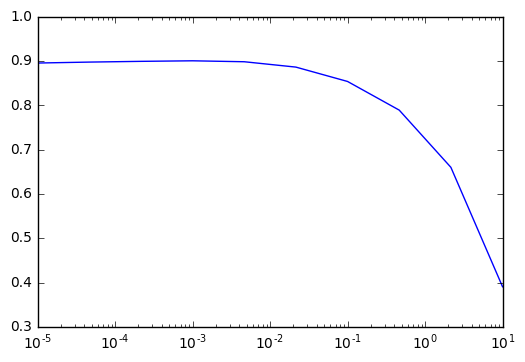

In [77]:
plt.plot(gs.cv_results_['param_alpha'].data, gs.cv_results_['mean_test_score'])
plt.xscale("log")

In [81]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, n_classes=2)

In [82]:
from sklearn.manifold import TSNE

tsne = TSNE()
X_projected = tsne.fit_transform(X)

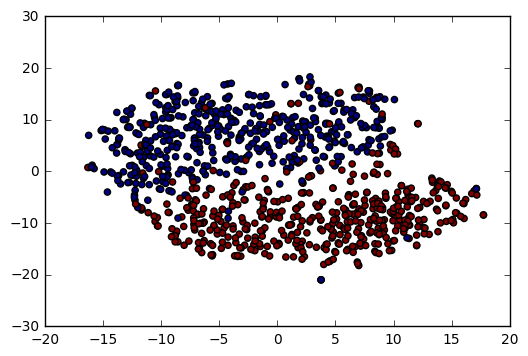

In [83]:
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y)

In [84]:
from sklearn.metrics import make_scorer

def precision(y_true, y_preds):
    return y_true[y_preds == 1].mean()

precision_score = make_scorer(precision, greater_is_better=True)

In [85]:
from sklearn.naive_bayes import GaussianNB

gauss_nb = GaussianNB()
print cross_val_score(gauss_nb, X, y, scoring=precision_score, cv=3).mean()

0.968511075928


In [54]:
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

X, y = make_classification(n_samples=1000, n_features=100)

In [55]:
%%time

knn = KNeighborsClassifier(metric='euclidean')
print cross_val_score(knn, X, y, scoring='neg_log_loss', cv=3).mean()

-0.760015630039
CPU times: user 140 ms, sys: 0 ns, total: 140 ms
Wall time: 140 ms


In [58]:
%%time

def my_euclidean(vec1, vec2):
    return sum((x-y) ** 2 for x, y in zip(vec1, vec2)) ** 0.5

knn = KNeighborsClassifier(metric=my_euclidean)
print cross_val_score(knn, X, y, scoring='neg_log_loss', cv=3).mean()

-0.760015630039
CPU times: user 33.8 s, sys: 0 ns, total: 33.8 s
Wall time: 33.7 s


In [60]:
%%time
def my_euclidean_numpy(vec1, vec2):
    return np.sqrt(np.pow(vec1 - vec2, 2).sum())

knn = KNeighborsClassifier(metric=my_euclidean)
print cross_val_score(knn, X, y, scoring='neg_log_loss', cv=3).mean()

-0.760015630039
CPU times: user 33 s, sys: 0 ns, total: 33 s
Wall time: 32.9 s
